In [1]:
!pip install kaggle

     ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
     -------------- ------------------------- 30.7/84.6 kB 1.4 MB/s eta 0:00:01
     -------------- ------------------------- 30.7/84.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 84.6/84.6 kB 594.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111955 sha256=bc601888b3377d051c52438b95e60ef254271a4f58c00161eb3397fd184700bc
  Stored in directory: c:\users\hai\appdata\local\pip\cache\wheels\97\06\54\3d44857e6aa73d66d0174f29389e7ea70c007105797e6ec05c
Successfully built kaggle


Saving kaggle.json to kaggle.json
Uploaded file: kaggle.json


In [ ]:
import os

# Set Kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "C:\\Users\\HAI\\Desktop\\ASL_ML\\"

# Optionally, you can move the kaggle.json file to the appropriate location

!kaggle datasets download -d grassknoted/asl-alphabet

In [ ]:
import zipfile

with zipfile.ZipFile('asl-alphabet.zip', 'r') as zip_ref:
    zip_ref.extractall('C:\\Users\\HAI\\Desktop\\ASL_ML\\')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dir = "C:\\Users\\HAI\\Desktop\\ASL_ML\\asl_alphabet_train"

test_dir = "C:\\Users\\HAI\\Desktop\\ASL_ML\\asl_alphabet_test"

In [3]:
import cv2
import os
import numpy as np
from tensorflow import keras

# Your updated labels_dict
labels_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10,
               'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20,
               'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26, 'del': 27, 'nothing': 28}

train_dir = r"C:\Users\HAI\Desktop\ASL_ML\asl_alphabet_train\asl_alphabet_train"

images = []
labels = []
size = (64, 64)

for folder in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, folder)):
        image_path = os.path.join(train_dir, folder, image)
        
        if os.path.isfile(image_path):
            temp_img = cv2.imread(image_path)
            
            if temp_img is not None and temp_img.size != 0:
                temp_img = cv2.resize(temp_img, size)
                images.append(temp_img)
                labels.append(labels_dict[folder])
            else:
                print(f"Error reading image: {image_path}")
        else:
            print(f"Invalid file path: {image_path}")

# Check if labels list is not empty before conversion
if labels:
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = keras.utils.to_categorical(labels, num_classes=len(labels_dict))
    print("Data loaded successfully.")
else:
    print("No valid data found.")


Data loaded successfully.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(X_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 69600 images for training, Train data shape = (69600, 64, 64, 3)
Loaded 17400 images for testing Test data shape = (17400, 29)


In [25]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define input shape
input_shape = (64, 64, 3)

# Define input layer
inputs = Input(shape=input_shape)

# First Convolutional Block
x = Conv2D(filters=128, kernel_size=(5, 5), padding='valid')(inputs)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

# Second Convolutional Block
x = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer='l2')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

# Third Convolutional Block
x = Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer='l2')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

# Flatten layer
x = Flatten()(x)

# Fully connected layers
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(units=29, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)         │ (None, 64, 64, 3)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)                  │ (None, 60, 60, 128)           │       9,728 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_3 (Activation)          │ (None, 60, 60, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 30, 30, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_3              │ (None, 30, 30, 128)           │         512 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_4 (Conv2D)                  │ (None, 28, 28, 64)            │      73,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_4 (Activation)          │ (None, 28, 28, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_4 (MaxPooling2D)     │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_4              │ (None, 14, 14, 64)            │         256 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_5 (Conv2D)                  │ (None, 12, 12, 32)            │      18,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_5 (Activation)          │ (None, 12, 12, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_5 (MaxPooling2D)     │ (None, 6, 6, 32)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_5              │ (None, 6, 6, 32)              │         128 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 1152)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 256)                   │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 29)                    │       7,453 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 405,501 (1.55 MB)

 Trainable params: 405,053 (1.55 MB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

optimizer = Adam(learning_rate=0.001)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1,
                    verbose=2,
                    callbacks=[reduce_lr])

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']



Epoch 1/20
1958/1958 - 191s - 98ms/step - accuracy: 0.9304 - loss: 0.3211 - val_accuracy: 0.4474 - val_loss: 4.5630 - learning_rate: 0.0010
Epoch 2/20
1958/1958 - 189s - 97ms/step - accuracy: 0.9379 - loss: 0.2937 - val_accuracy: 0.9647 - val_loss: 0.2072 - learning_rate: 0.0010
Epoch 3/20
1958/1958 - 188s - 96ms/step - accuracy: 0.9444 - loss: 0.2732 - val_accuracy: 0.8476 - val_loss: 0.6321 - learning_rate: 0.0010
Epoch 4/20
1958/1958 - 188s - 96ms/step - accuracy: 0.9491 - loss: 0.2536 - val_accuracy: 0.8938 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 5/20
1958/1958 - 188s - 96ms/step - accuracy: 0.9542 - loss: 0.2319 - val_accuracy: 0.9823 - val_loss: 0.1496 - learning_rate: 0.0010
Epoch 6/20
1958/1958 - 188s - 96ms/step - accuracy: 0.9532 - loss: 0.2402 - val_accuracy: 0.9912 - val_loss: 0.1253 - learning_rate: 0.0010
Epoch 7/20
1958/1958 - 187s - 95ms/step - accuracy: 0.9575 - loss: 0.2242 - val_accuracy: 0.6661 - val_loss: 2.8666 - learning_rate: 0.0010
Epoch 8/20
1958/1958

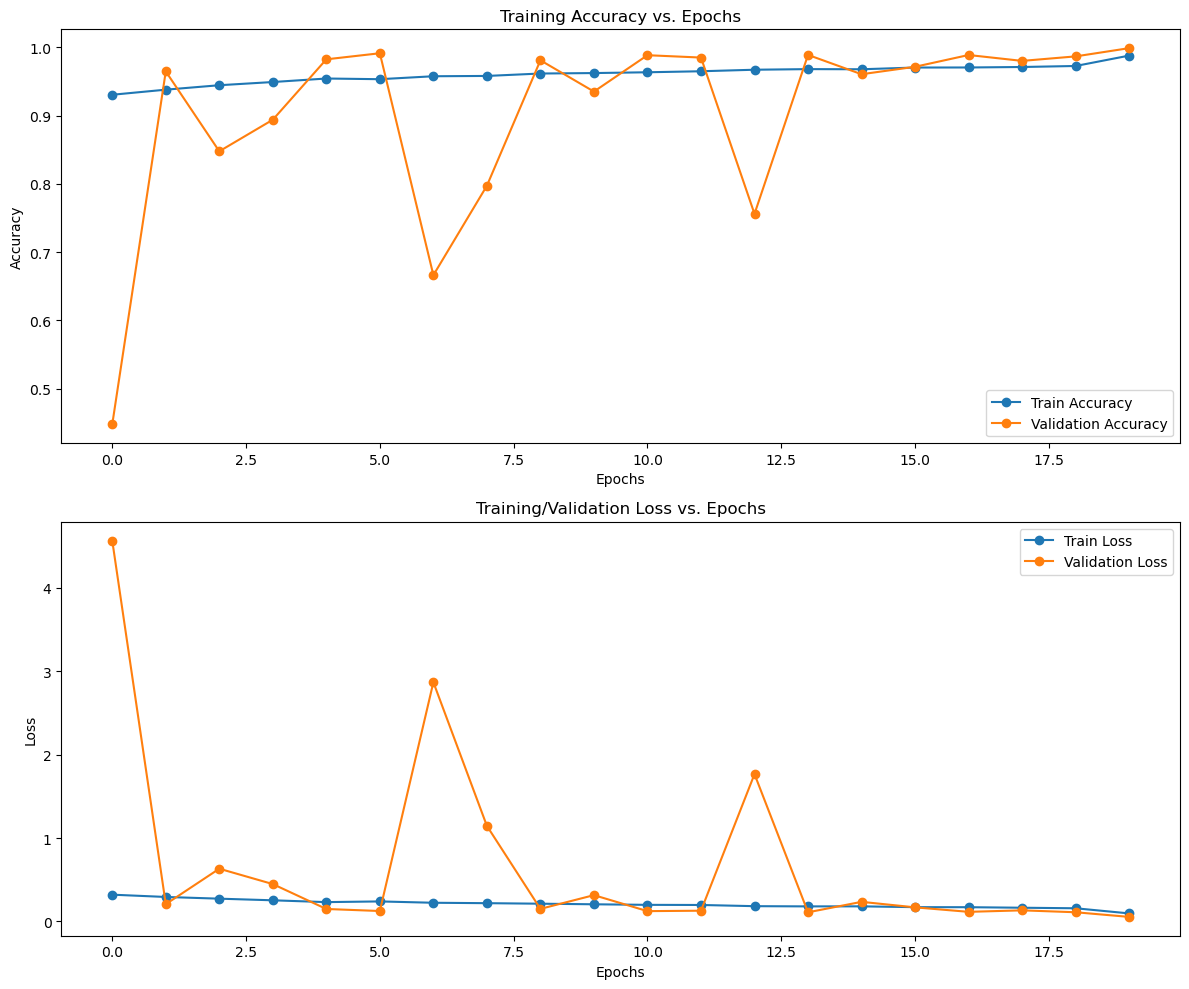

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

544/544 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9979 - loss: 0.0555


In [45]:
X_test.shape


(17400, 64, 64, 3)

In [46]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step


In [47]:
from tensorflow.keras.models import load_model

# Assuming you have trained your model and stored it in the variable 'model'
# Code for training the model should go here

# Save the trained model to an H5 file
model.save(r'C:\Users\HAI\Desktop\ASL_ML\ASL.h5')


C:\Users\HAI\anaconda3\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


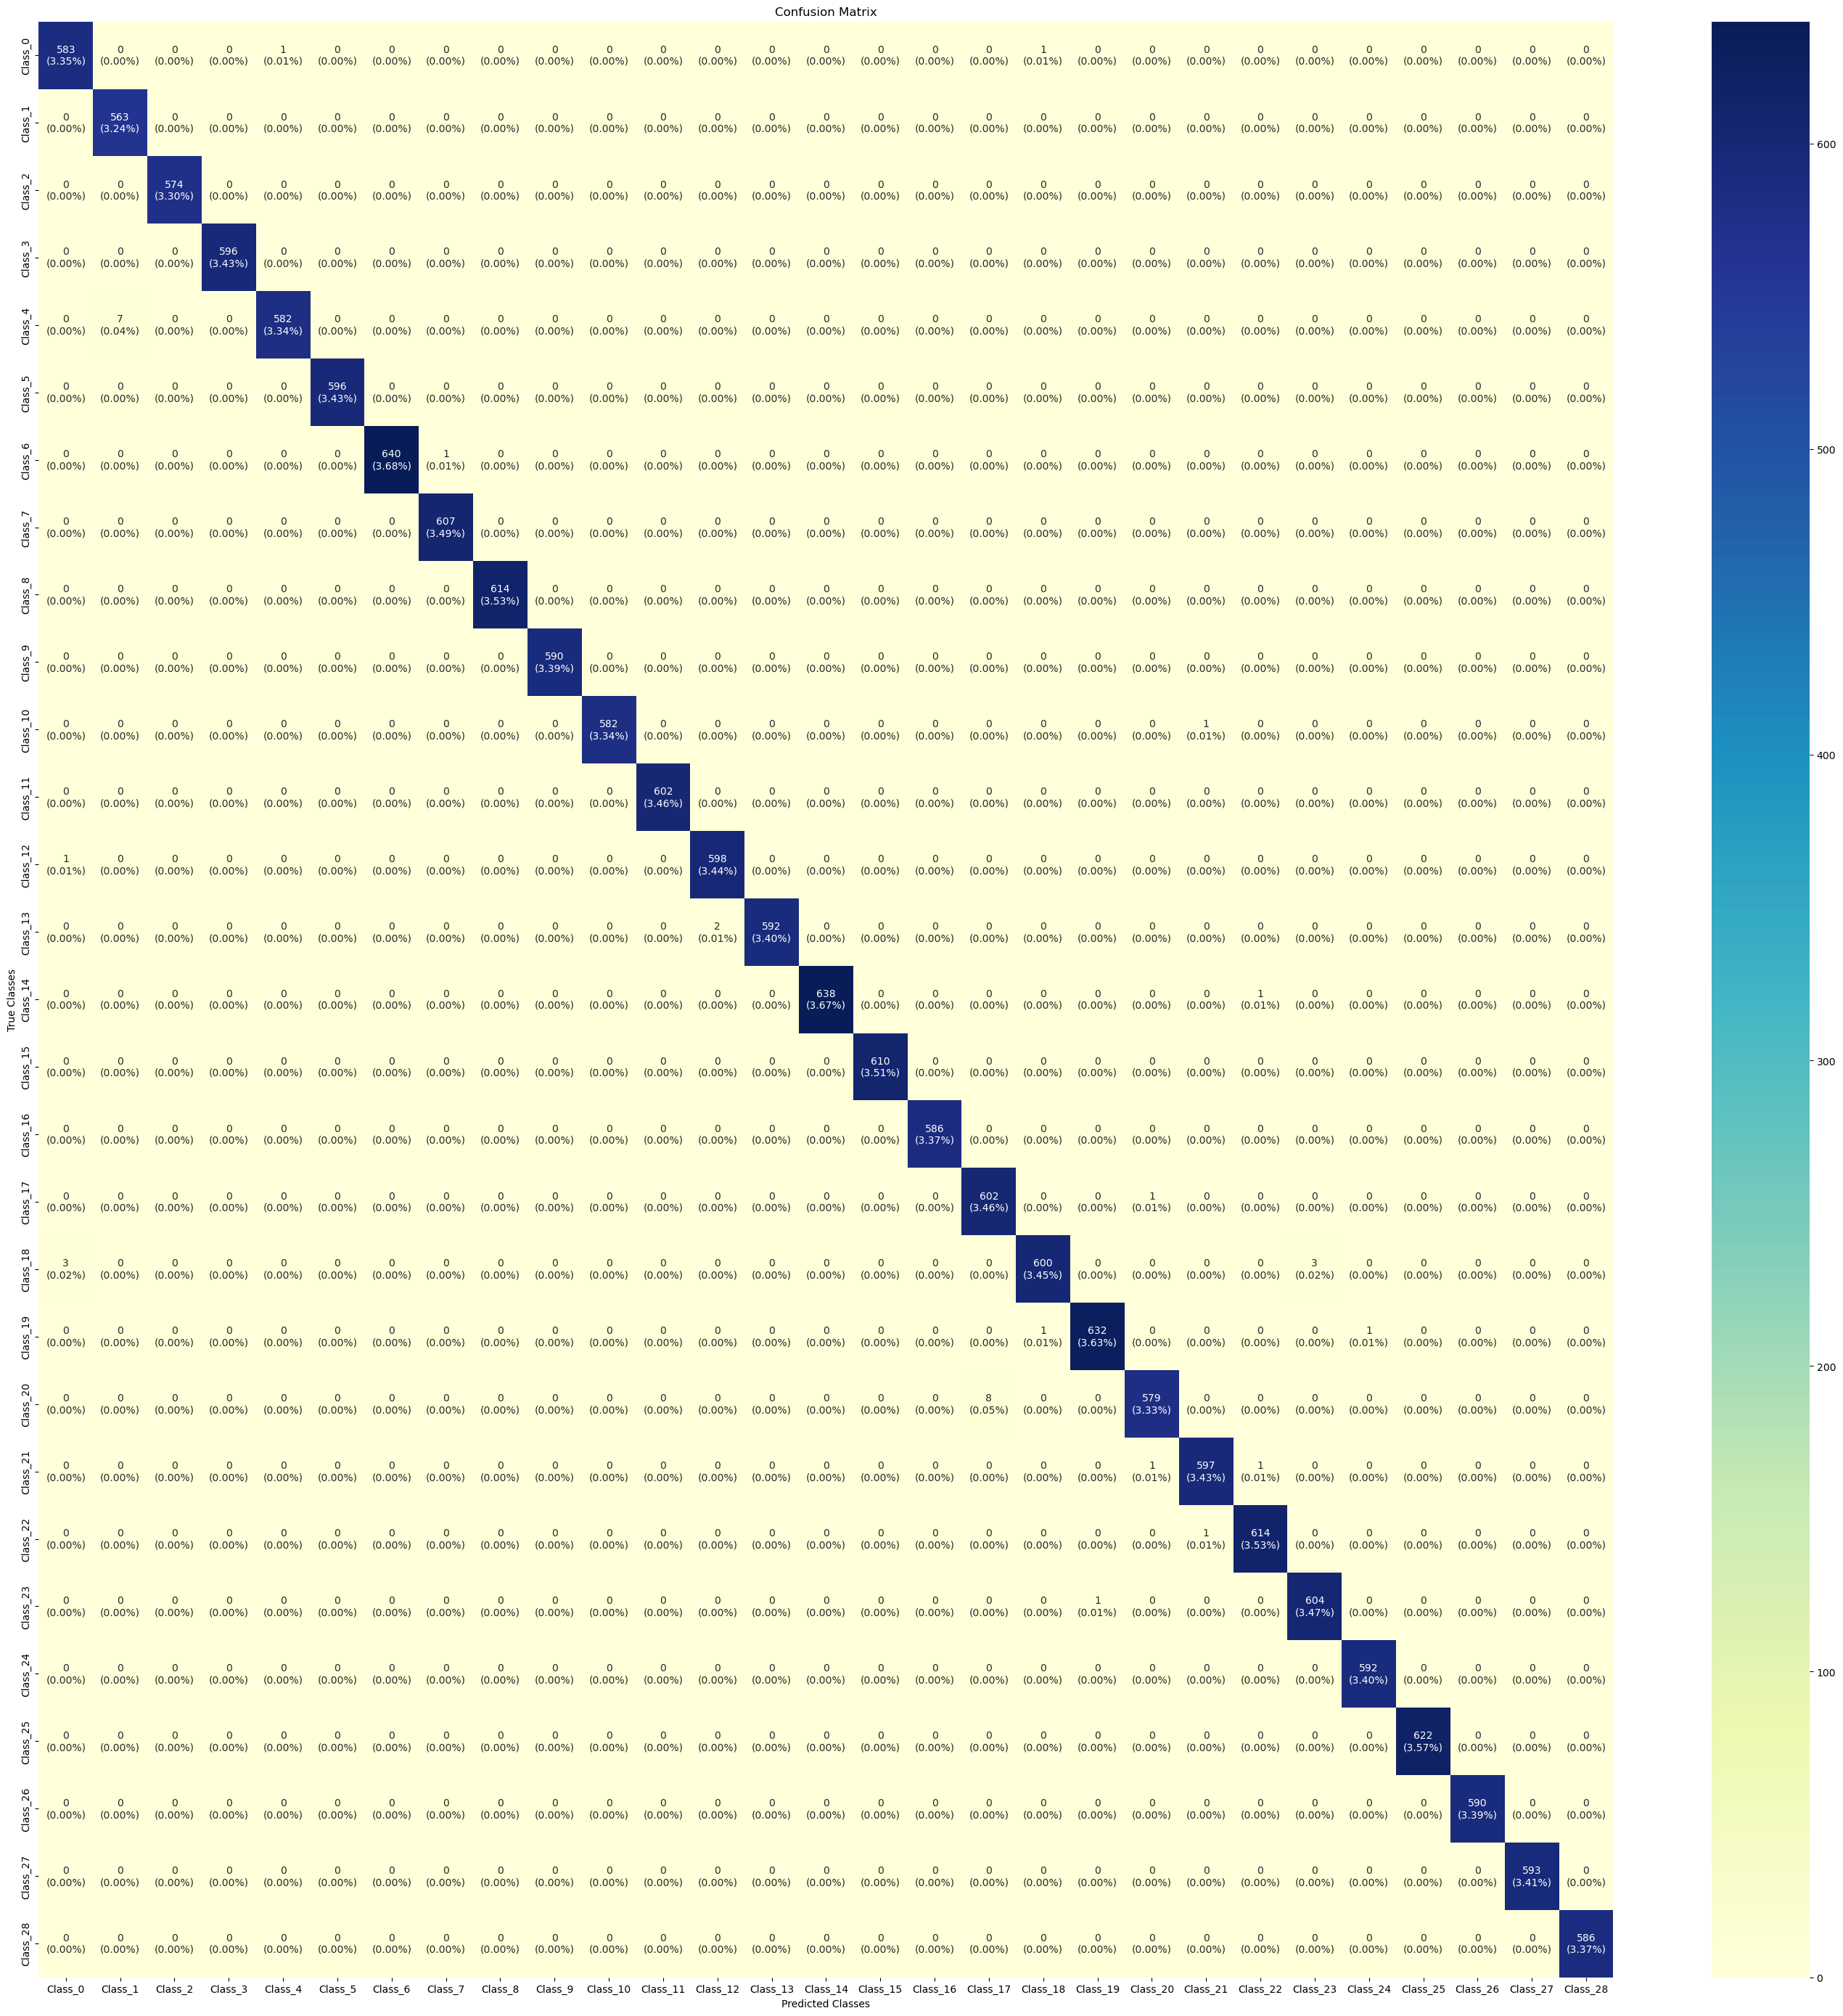

In [48]:
cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = [f'Class_{i}' for i in range(29)]

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(35, 35))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true,y_pred))

Code to test single image

In [49]:
import cv2
import numpy as np
from tensorflow import keras
#replace with the path of the file which you wish to test
image_path=r"C:\Users\HAI\Desktop\ASL_ML\asl_alphabet_test\asl_alphabet_test\A_test.jpg"
# Your updated labels_dict
labels_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10,
               'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20,
               'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26, 'del': 27, 'nothing': 28}

def preprocess_single_image(image_path, size=(64, 64)):
    # Read the image from the file
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is None or image.size == 0:
        print(f"Error reading image: {image_path}")
        return None
    
    # Resize the image to the specified size
    image = cv2.resize(image, size)
    
    # Convert the image to float32 and normalize
    image = image.astype('float32') / 255.0
    
    return image


preprocessed_image = preprocess_single_image(image_path)
if preprocessed_image is not None:
    print("Preprocessed image shape:", preprocessed_image.shape)


Preprocessed image shape: (64, 64, 3)


In [50]:
preprocessed_image_with_batch = np.expand_dims(preprocessed_image, axis=0)
print(preprocessed_image_with_batch.shape)  # (1, 64, 64, 3)

# Now, perform prediction
predictions = model.predict(preprocessed_image_with_batch)

(1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [51]:
y_pred = np.argmax(predictions, axis=1)
y_pred

array([0], dtype=int64)